--------------------------------------NLP project to Predict the Toxicity of Tweets-------------------------------------

In [1]:
#read the tweets dataset - csv file
import pandas as pd
df = pd.read_csv(r"C:\Users\rnirm\Downloads\FinalBalancedDataset.csv.zip")
df_1 = df[['Toxicity','tweet']]
df_1 = df_1.head(10000)
df_1

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
9995,0,@user my routine is out of whack! evening wal...
9996,0,i'm dead but still happy #poledance #madrid ##...
9997,0,â #united kingdom claimant count rate up to...
9998,0,rip my friend ð¢ð¢ #shocked #dismay #hea...


In [17]:
#check for null value
df_1.isnull().sum()

Toxicity    0
tweet       0
dtype: int64

In [2]:
#import necessary packages

import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import pickle

In [3]:
#function to clean the tweets

def clean_text(texts):
    clean_texts = []
    for text in texts:
        text = text.lower()
        tokens  = word_tokenize(text) 
        #print(tokens,"\n")
        cleaned_tokens = []
        lemmatizer = WordNetLemmatizer()
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words): 
                word = word.strip(string.punctuation)  
                word = lemmatizer.lemmatize(word)  
                word = word.strip()
                cleaned_tokens.append(word)  
            cleaned_text = " ".join(cleaned_tokens) 
        clean_texts.append(cleaned_text)
    return clean_texts

df_1['cleaned_tweet'] = clean_text(df_1['tweet'])
df_1.tail(4)



,Toxicity,tweet,cleaned_tweet
9996,0,i'm dead but still happy #poledance #madrid ##...,dead still happy poledance madrid fitness madr...
9997,0,â #united kingdom claimant count rate up to...,united kingdom claimant count rate may previou...
9998,0,rip my friend ð¢ð¢ #shocked #dismay #hea...,rip friend shocked dismay heabroken cannotbeli...
9999,0,"how to open... your , loving hea #thursdayth...",open loving hea thursdaythoughts relationship ...


In [20]:
df_1.dtypes

Toxicity          int64
tweet            object
cleaned_tweet    object
dtype: object

CountVectorizer Approach

In [4]:
x=df_1['cleaned_tweet'] #dependent feature
y=df_1['Toxicity']      #independent feature/target variable


#check for class imbalance
df_1['Toxicity'].value_counts()

Toxicity
0    9305
1     695
Name: count, dtype: int64

In [5]:
#transforming tweets to vectors using countvectorizer

vectorizer = CountVectorizer(max_features=1000)
fit = vectorizer.fit_transform(x)
cv = fit.toarray()
cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
#balance the class using resampling techniques

x_new, y_new = SMOTETomek(). fit_resample(cv,y)
y_new.value_counts()

Toxicity
0    9303
1    9303
Name: count, dtype: int64

In [7]:
(x_new.shape), (y_new.shape)

((18606, 1000), (18606,))

In [42]:
#define a function to assess accuracy of different models

def classification(x,y,model):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    metrics = {'Algorithm':type(model).__name__,
       "Accuracy on train set": accuracy_train,
       "Accuracy on test set": accuracy_test}
    return metrics

print(classification(x_new,y_new,RandomForestClassifier()))
print(classification(x_new,y_new,DecisionTreeClassifier()))
print(classification(x_new,y_new,MultinomialNB()))
print(classification(x_new,y_new,KNeighborsClassifier(n_neighbors=3)))
print(classification(x_new,y_new,SVC(kernel='linear')))

{'Algorithm': 'RandomForestClassifier', 'Accuracy on train set': 0.9827331362536953, 'Accuracy on test set': 0.9204728640515851}
{'Algorithm': 'DecisionTreeClassifier', 'Accuracy on train set': 0.9827331362536953, 'Accuracy on test set': 0.9067705534658785}
{'Algorithm': 'MultinomialNB', 'Accuracy on train set': 0.8091910776672937, 'Accuracy on test set': 0.8022568511552929}
{'Algorithm': 'KNeighborsClassifier', 'Accuracy on train set': 0.8589088954582101, 'Accuracy on test set': 0.7893605588393336}
{'Algorithm': 'SVC', 'Accuracy on train set': 0.9537086804622413, 'Accuracy on test set': 0.9328318108543794}


In [7]:
scores = cross_val_score(RandomForestClassifier(), x_new, y_new, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.87211177 0.9360387  0.93469497 0.92555765 0.9360387 ]
Mean cross-validation score: 0.9208883573357772


In [8]:
scores = cross_val_score(SVC(), x_new, y_new, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.85948415 0.96264445 0.95592583 0.95861328 0.95968826]
Mean cross-validation score: 0.9392711913921898


In [48]:
#Hyperparameter Tuning - RF

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

parameters = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2'],
               'n_estimators': [100, 200, 300]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [53]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=10,
                       n_estimators=300)

In [49]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [50]:
grid_search.best_score_

0.8660309911833014

In [63]:
#Hyperparameter Tuning - SVC
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
            }

grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [64]:
grid_search.best_score_

0.9418840817233196

In [65]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [12]:
#Fit the model for training and find its accuracy and other metrics- RF 
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=10,n_estimators=300)
model.fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.8732195646331631
Accuracy_Test:  0.8648576034390113
  


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=10,n_estimators=300)
model.fit(x_train,y_train)


y_pred_test = model.predict(x_test)

print("Confusion_matrix")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Confusion_matrix
--------------------------
[[1428  411]
 [  53 1830]]
 
Classification_report
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1839
           1       0.82      0.97      0.89      1883

    accuracy                           0.88      3722
   macro avg       0.89      0.87      0.87      3722
weighted avg       0.89      0.88      0.87      3722



In [15]:
#Save the model in pickle and load again to check for predictions

with open('CV_RandomForest_model.pkl','wb')as f:
    pickle.dump(model,f)

In [16]:
df_1.tail(3)

,Toxicity,tweet,cleaned_tweet
9997,0,â #united kingdom claimant count rate up to...,united kingdom claimant count rate may previou...
9998,0,rip my friend ð¢ð¢ #shocked #dismay #hea...,rip friend shocked dismay heabroken cannotbeli...
9999,0,"how to open... your , loving hea #thursdayth...",open loving hea thursdaythoughts relationship ...


In [17]:
df_1.iloc[9997,2]

'united kingdom claimant count rate may previous blog silver gold forex'

In [ ]:

with open('vectorizer.pkl','rb') as f:
    vec = pickle.load(f)

with open('CV_RandomForest_model.pkl','rb') as f:
    ml = pickle.load(f)

input = ['united kingdom claimant count rate may previous blog silver gold forex']
input_vec = vec.transform(input)
pred = ml.predict(input_vec)
pred

In [8]:
#Fit the model for training and find its accuracy and other metrics- SVC

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = SVC(C=10,gamma='scale',kernel='rbf')
model.fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9822628325718893
Accuracy_Test:  0.9478774852229984
  


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = SVC(C=10,gamma='scale',kernel='rbf')
model.fit(x_train,y_train)


y_pred_test = model.predict(x_test)

print("Confusion_matrix")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Confusion_matrix
--------------------------
[[1708  131]
 [  63 1820]]
 
Classification_report
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1839
           1       0.93      0.97      0.95      1883

    accuracy                           0.95      3722
   macro avg       0.95      0.95      0.95      3722
weighted avg       0.95      0.95      0.95      3722



In [68]:
#Roc & AUC curve

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred_test)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9482043191752889


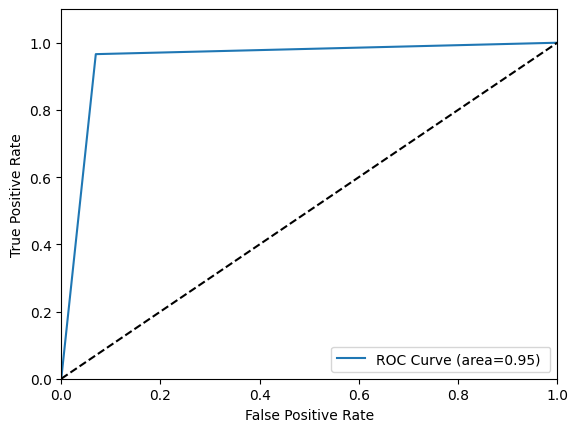

In [70]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [38]:
#save the model in pickle
with open('vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer,f)

with open('svm_classification_model.pkl','wb') as f:
    pickle.dump(model,f)
    

In [18]:
df_1.sample(3)

,Toxicity,tweet,cleaned_tweet
3561,0,when you finally make it home to your best fri...,finally make home best friend bestfriends cat ...
6277,0,my hair growing look at my baby hairs!!.#bless...,hair growing look baby hair blessed
1043,0,â #williams companies will energy transfer ...,williams company energy transfer paners heirat...


In [19]:
df_1.iloc[3561,2]

'finally make home best friend bestfriends cat catlover pet catlady love garfield'

In [19]:
#open the loaded pickle files and check for predictions
import numpy as np

with open('vectorizer.pkl','rb') as f:
    vec = pickle.load(f)

with open('svm_classification_model.pkl','rb') as f:
    ml = pickle.load(f)

In [ ]:
input = np.array(['finally make home best friend bestfriends cat catlover pet catlady love garfield'])
input_vec = vec.transform(input)
pred = ml.predict(input_vec)
pred

Tf-idf Approach

In [30]:
#convert tweets into vectors using Tfidf

x=df_1['cleaned_tweet']
y=df_1['Toxicity']

tfidf = TfidfVectorizer(max_features=1000)
vec = tfidf.fit_transform(x).toarray()
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#check for class imbalance

y.value_counts()

Toxicity
0    9305
1     695
Name: count, dtype: int64

In [31]:
#Make the class balanced by resampling techniques

x_new, y_new = SMOTETomek(). fit_resample(vec,y)
y_new.value_counts()

Toxicity
0    9304
1    9304
Name: count, dtype: int64

In [32]:
(x.shape),(y.shape)

((10000,), (10000,))

In [33]:
(x_new.shape),(y_new.shape)

((18608, 1000), (18608,))

In [34]:
#define a function to assess accuracy of different models

def classification(x,y,model):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

    model.fit(x_train,y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    metrics = {'Algorithm' : type(model).__name__,
               'Train Accuracy':accuracy_score(y_train, y_pred_train),
               'Test_Accuracy': accuracy_score(y_test, y_pred_test)
    }
    return metrics

print(classification(x_new,y_new,RandomForestClassifier()))
print(classification(x_new,y_new,DecisionTreeClassifier()))
print(classification(x_new,y_new,MultinomialNB()))
print(classification(x_new,y_new,KNeighborsClassifier(n_neighbors=3)))
print(classification(x_new,y_new,SVC(kernel='linear')))

{'Algorithm': 'RandomForestClassifier', 'Train Accuracy': 0.9876393927179901, 'Test_Accuracy': 0.9524449220849006}
{'Algorithm': 'DecisionTreeClassifier', 'Train Accuracy': 0.9876393927179901, 'Test_Accuracy': 0.9223535733476625}
{'Algorithm': 'MultinomialNB', 'Train Accuracy': 0.8882842939674862, 'Test_Accuracy': 0.8790972595378829}
{'Algorithm': 'KNeighborsClassifier', 'Train Accuracy': 0.8001477898696762, 'Test_Accuracy': 0.7251477700161204}
{'Algorithm': 'SVC', 'Train Accuracy': 0.9286577992744861, 'Test_Accuracy': 0.9167114454594304}


In [ ]:
#RandomForest algorithm has good test accuracy than others. So, i select that algorithm for my data.

In [35]:
#checking cross validation score for the model

scores = cross_val_score(RandomForestClassifier(), x_new, y_new, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.95083289 0.95674369 0.95486298 0.94866971 0.95619457]
Mean cross-validation score: 0.9534607664848895


In [36]:
#cv score close to test accuracy of the model, so model performs well. 
#Fit the RF_classifier model on data for training and check for accuracy.

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")


Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9876393927179901
Accuracy_Test:  0.9543256313809779
  


In [37]:
#Evaluate the model's performance

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(x_train,y_train)


y_pred_test = model.predict(x_test)

print("Confusion_matrix")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Confusion_matrix
--------------------------
[[1744  115]
 [  56 1807]]
 
Classification_report
-------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1859
           1       0.94      0.97      0.95      1863

    accuracy                           0.95      3722
   macro avg       0.95      0.95      0.95      3722
weighted avg       0.95      0.95      0.95      3722



In [38]:
#Roc & AUC curve

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred_test)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9540398698704161


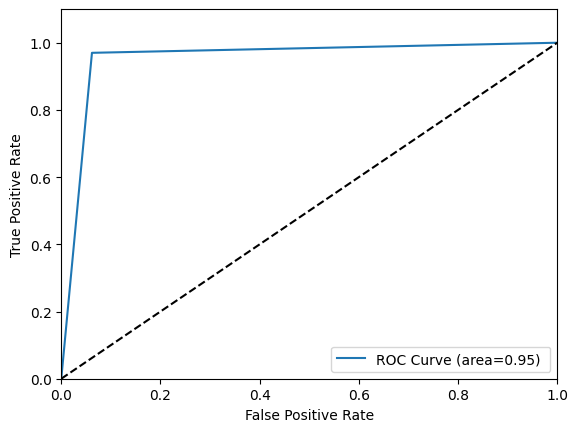

In [39]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [41]:
#Save the model in pickle

with open('tfidf_vectorizer.pkl','wb') as f:
    pickle.dump(tfidf,f)
with open('RF_classifier.pkl','wb') as f:
    pickle.dump(model,f)

In [42]:
#load the saved model

with open('tfidf_vectorizer.pkl','rb') as f:
    vec = pickle.load(f)
with open('RF_classifier.pkl','rb') as f:
    ml = pickle.load(f)

In [44]:
df_1.sample(3)

,Toxicity,tweet,cleaned_tweet
6765,0,#lessismore polar bear climb racing: angry p...,lessismore polar bear climb racing angry polar...
9763,0,regram @user #goodmorning #selfie #day #brun...,regram user goodmorning selfie day brunette go...
7493,0,be passionate~be happy ð don't let anyone s...,happy let anyone stop thing love


In [46]:
df_1.iloc[6765,2]

'lessismore polar bear climb racing angry polar bear climb racing polar bear living cold place l'

In [59]:
#check the Model's Toxicity prediction by manually passing tweets

input = ['lessismore polar bear climb racing angry polar bear climb racing polar bear living cold place l']
input_vec = vec.transform(input)
pred = ml.predict(input_vec)
pred

array([0], dtype=int64)

In [55]:
df_1[df_1['Toxicity']== 1].head(2)

,Toxicity,tweet,cleaned_tweet
13,1,@user #cnn calls #michigan middle school 'buil...,user cnn call michigan middle school wall chan...
14,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...


In [56]:
df_1.iloc[13,2]

'user cnn call michigan middle school wall chant tcot'

In [58]:
input =['user cnn call michigan middle school wall chant tcot']
input_vec = vec.transform(input)
pred = ml.predict(input_vec)
pred

array([1], dtype=int64)

So, in Tfidf Approach, RandomForest algorithm accurately predicts the Toxicity of Tweets 

Tfidf approach would perform better compared to CountVectorizer, as it gives importance to rare words and frequent words in document,
which is very much necessary for tasks like toxicity prediction. 